<a href="https://colab.research.google.com/github/lala991204/ML-self-study/blob/master/8_8_Document_Similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 문서 유사도 측정 방법 - 코사인 유사도

In [1]:
import sklearn
print(sklearn.__version__)

1.0.1


In [6]:
import numpy as np

def cos_similarity(v1, v2):
    dot_product = np.dot(v1, v2)
    l2_norm = (np.sqrt(sum(np.square(v1))) * np.sqrt(sum(np.square(v2))))
    similarity = dot_product / l2_norm

    return similarity

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

doc_list = ['if you take the blue pill, the story ends' ,
            'if you take the red pill, you stay in Wonderland',
            'if you take the red pill, I show you how deep the rabbit hole goes']

tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)
print(feature_vect_simple.shape)          # 3개의 문장, 18개의 words

(3, 18)


In [8]:
# TfidfVectorizer로 transform()한 결과는 Sparse Matrix이므로 Dense Matrix로 변환
# (Sparse Matrix는 0이 많은 편이라 메모리 낭비 때문에)
feature_vect_dense = feature_vect_simple.todense()

# 첫 번째 문장과 두 번째 문장의 feature vector 추출(1Dim으로 변환)
vect1 = np.array(feature_vect_dense[0]).reshape(-1,) 
vect2 = np.array(feature_vect_dense[1]).reshape(-1,)

# 첫 번째 문장과 두 번째 문장의 feature vector로 두 개 문장의 Cosine 유사도 추출
similarity_simple = cos_similarity(vect1, vect2)
print('문장 1, 문장 2 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장 1, 문장 2 Cosine 유사도: 0.402


In [24]:
print(feature_vect_simple)

  (0, 2)	0.41556360057939173
  (0, 13)	0.41556360057939173
  (0, 8)	0.24543855687841593
  (0, 0)	0.41556360057939173
  (0, 15)	0.49087711375683185
  (0, 14)	0.24543855687841593
  (0, 17)	0.24543855687841593
  (0, 6)	0.24543855687841593
  (1, 16)	0.39624495215024286
  (1, 7)	0.39624495215024286
  (1, 12)	0.39624495215024286
  (1, 10)	0.3013544995034864
  (1, 8)	0.2340286519091622
  (1, 15)	0.2340286519091622
  (1, 14)	0.2340286519091622
  (1, 17)	0.4680573038183244
  (1, 6)	0.2340286519091622
  (2, 3)	0.3098560092999078
  (2, 4)	0.3098560092999078
  (2, 9)	0.3098560092999078
  (2, 1)	0.3098560092999078
  (2, 5)	0.3098560092999078
  (2, 11)	0.3098560092999078
  (2, 10)	0.23565348175165166
  (2, 8)	0.1830059506093466
  (2, 15)	0.3660119012186932
  (2, 14)	0.1830059506093466
  (2, 17)	0.3660119012186932
  (2, 6)	0.1830059506093466


In [25]:
print(feature_vect_simple[0])

  (0, 2)	0.41556360057939173
  (0, 13)	0.41556360057939173
  (0, 8)	0.24543855687841593
  (0, 0)	0.41556360057939173
  (0, 15)	0.49087711375683185
  (0, 14)	0.24543855687841593
  (0, 17)	0.24543855687841593
  (0, 6)	0.24543855687841593


In [18]:
feature_vect_dense

matrix([[0.4155636 , 0.        , 0.4155636 , 0.        , 0.        ,
         0.        , 0.24543856, 0.        , 0.24543856, 0.        ,
         0.        , 0.        , 0.        , 0.4155636 , 0.24543856,
         0.49087711, 0.        , 0.24543856],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.23402865, 0.39624495, 0.23402865, 0.        ,
         0.3013545 , 0.        , 0.39624495, 0.        , 0.23402865,
         0.23402865, 0.39624495, 0.4680573 ],
        [0.        , 0.30985601, 0.        , 0.30985601, 0.30985601,
         0.30985601, 0.18300595, 0.        , 0.18300595, 0.30985601,
         0.23565348, 0.30985601, 0.        , 0.        , 0.18300595,
         0.3660119 , 0.        , 0.3660119 ]])

In [12]:
vect1

array([0.4155636 , 0.        , 0.4155636 , 0.        , 0.        ,
       0.        , 0.24543856, 0.        , 0.24543856, 0.        ,
       0.        , 0.        , 0.        , 0.4155636 , 0.24543856,
       0.49087711, 0.        , 0.24543856])

In [19]:
vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
vect3 = np.array(feature_vect_dense[2]).reshape(-1,)
similarity_simple = cos_similarity(vect1, vect3 )
print('문장 1, 문장 3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

vect2 = np.array(feature_vect_dense[1]).reshape(-1,)
vect3 = np.array(feature_vect_dense[2]).reshape(-1,)
similarity_simple = cos_similarity(vect2, vect3 )
print('문장 2, 문장 3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장 1, 문장 3 Cosine 유사도: 0.404
문장 2, 문장 3 Cosine 유사도: 0.456


In [20]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple)
print(similarity_simple_pair)

[[1.         0.40207758 0.40425045]]


In [21]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0] , feature_vect_simple[1:])
print(similarity_simple_pair)

[[0.40207758 0.40425045]]


In [22]:
similarity_simple_pair = cosine_similarity(feature_vect_simple , feature_vect_simple)
print(similarity_simple_pair)
print('shape:',similarity_simple_pair.shape)

[[1.         0.40207758 0.40425045]
 [0.40207758 1.         0.45647296]
 [0.40425045 0.45647296 1.        ]]
shape: (3, 3)


# Opinion Review 데이터 셋을 이용한 문서 유사도 측정

In [28]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [29]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [41]:
import pandas as pd
import glob ,os
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

path = '/content/drive/MyDrive/Colab Notebooks/github/ML-self-study/OpinosisDataset1.0'   

# path로 지정한 디렉토리 밑에 있는 모든 (.txt).data 파일들의 파일명을 리스트로 취합
all_files = glob.glob(os.path.join(path, "*.txt.data"))    
filename_list = []
opinion_text = []

for file_ in all_files:
    # 개별 파일을 읽어서 DataFrame으로 생성 
    df = pd.read_table(file_,index_col=None, header=0,encoding='latin1')
    
    filename_ = file_.split('/')[-1]     # 앞서 설정한 경로들의 마지막 부분만 추출(파일명, 확장자명 포함된)
    filename = filename_.split('.')[0]   # 파일명만 추출
    filename_list.append(filename)
    opinion_text.append(df.to_string())    # 뒤에서 lower()를 적용하기 위해 문자열로 변환

# 파일명 리스트와 파일내용 리스트를  DataFrame으로 생성
document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})


tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english', ngram_range=(1,2), min_df=0.05,
                             max_df=0.85)

feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label'] = cluster_label

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  % sorted(inconsistent)


In [43]:
document_df[document_df['cluster_label']==1]

,filename,opinion_text,cluster_label
0,display_garmin_nuvi_255W_gps,...,1
2,buttons_amazon_kindle,...,1
3,features_windows7,...,1
4,navigation_amazon_kindle,...,1
5,accuracy_garmin_nuvi_255W_gps,...,1
6,battery-life_ipod_nano_8gb,...,1
11,fonts_amazon_kindle,...,1
12,battery-life_amazon_kindle,...,1
15,eyesight-issues_amazon_kindle,...,1
17,battery-life_netbook_1005ha,...,1


In [42]:
from sklearn.metrics.pairwise import cosine_similarity

# cluster_label=1인 데이터는 소셜미디어로 클러스터링된 데이터임
# DataFrame에서 해당 Index를 추출
social_indexes = document_df[document_df['cluster_label']==1].index
print('소셜미디어로 클러스터링 된 문서들의 DataFrame Index:', social_indexes)

# 소셜미디어로 클러스터링된 데이터 중 첫번째 문서를 추출하여 파일명 표시.  
comparison_docname = document_df.iloc[social_indexes[0]]['filename']
print('##### 비교 기준 문서명 ',comparison_docname,' 와 타 문서 유사도######')

''' document_df에서 추출한 Index 객체를 feature_vect로 입력하여 소셜미디어 클러스터링된 feature_vect 추출 
이를 이용하여 소셜미디어로 클러스터링된 문서 중 첫번째 문서와 다른 문서간의 코사인 유사도 측정.'''
similarity_pair = cosine_similarity(feature_vect[social_indexes[0]] , feature_vect[social_indexes])
print(similarity_pair)

호텔로 클러스터링 된 문서들의 DataFrame Index: Int64Index([ 0,  2,  3,  4,  5,  6, 11, 12, 15, 17, 19, 23, 26, 27, 32, 33, 34,
            40, 41, 42, 43, 44, 46, 48, 49],
           dtype='int64')
##### 비교 기준 문서명  display_garmin_nuvi_255W_gps  와 타 문서 유사도######
[[1.         0.07146012 0.06723268 0.10383889 0.19665144 0.02141378
  0.07214808 0.0197642  0.08211019 0.02108241 0.15187003 0.02631334
  0.02105941 0.07586943 0.04622382 0.01796937 0.12333832 0.10182582
  0.50278164 0.30598598 0.0605971  0.02792002 0.01912972 0.20615269
  0.06712755]]


Text(0.5, 1.0, 'display_garmin_nuvi_255W_gps')

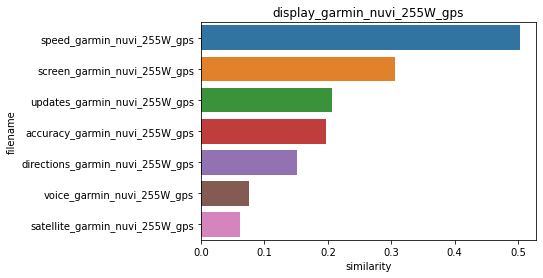

In [34]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# argsort()를 이용하여 앞 예제의 첫 번째 문서와 타 문서간 유사도가 큰 순으로 정렬한 인덱스 반환
# 자기 자신 제외
sorted_index = similarity_pair.argsort()[:,::-1] 
sorted_index = sorted_index[:, 1:]

# 유사도가 큰 순으로 social_indexes를 추출하여 재 정렬. 
social_sorted_indexes = social_indexes[sorted_index.reshape(-1)]  

# 유사도가 큰 순으로 유사도 값을 재정렬하되 자기 자신은 제외
social_1_sim_value = np.sort(similarity_pair.reshape(-1))[::-1]
social_1_sim_value = social_1_sim_value[1:]

# 유사도가 큰 순으로 정렬된 Index와 유사도값을 이용하여 파일명과 유사도값을 Seaborn 막대 그래프로 시각화
social_1_sim_df = pd.DataFrame()
social_1_sim_df['filename'] = document_df.iloc[social_sorted_indexes]['filename']
social_1_sim_df['similarity'] = social_1_sim_value

sns.barplot(x='similarity', y='filename',data=social_1_sim_df)
plt.title(comparison_docname)